In [1]:
import requests

#parses the unwanted data and helps to organize 
#and format the messy web data by fixing bad HTML 
#and present to us in an easily-traversible XML structures.
from bs4 import BeautifulSoup as bs  

import csv
import pandas as pd

In [2]:
# Access the website
url = 'https://eg1lib.org/s/programming%20concepts/?type=phrase'
request = requests.get(url)
request

<Response [200]>

In [3]:
# Showing the content of the page
request.content[:500]

b'\n<!DOCTYPE html>\n<html>\n    <head>\n        <script type="text/javascript">\n            navigator.sayswho = (function(){\n                var ua= navigator.userAgent, tem,\n                M= ua.match(/(opera|chrome|safari|firefox|msie|trident(?=\\/))\\/?\\s*(\\d+)/i) || [];\n                if(/trident/i.test(M[1])){\n                    tem=  /\\brv[ :]+(\\d+)/g.exec(ua) || [];\n                    return \'IE \'+(tem[1] || \'\');\n                }\n                if(M[1]=== \'Chrome\'){\n                    tem'

##        

In [4]:
soup = bs(request.content,'html.parser')

> Variable (soup) now **have the whole content in the page that we want to scrape**. While scrapping, we will always use (soup).

<h2 align='center'><font color ='brown'> Scrapping </font></h2>

In [5]:
containers = soup.find_all('div', {'class':'resItemBox resItemBoxBooks exactMatch'})
containers[0]

<div class="resItemBox resItemBoxBooks exactMatch" data-book_id="15423729" data-spelling-suggest="true" itemscope="" itemtype="http://schema.org/Book">
<div>
<div class="counter">1</div>
<table class="resItemTable" style="width:100%; height:100%;">
<tr class="bookRow" data-book_id="15423729">
<td class="itemCover">
<div class="checkBookDownloaded itemCoverWrapper" data-book_id="15423729" data-isbn="9781801071109">
<div class="z-book-precover" style="">
<a href="/book/15423729/0da490"><img alt="" class="cover lazy" data-src="https://covers.zlibcdn2.com/covers100/books/f2/a6/e1/f2a6e1427f1cd3001961b60a5ff5789e.jpg" data-srcset="https://covers.zlibcdn2.com/covers100/books/f2/a6/e1/f2a6e1427f1cd3001961b60a5ff5789e.jpg 1x, https://covers.zlibcdn2.com/covers200/books/f2/a6/e1/f2a6e1427f1cd3001961b60a5ff5789e.jpg 2x"/></a>
</div>
</div>
</td>
<td style="vertical-align: top;">
<table style="width:100%;height:100%;">
<tr>
<td>
<h3 itemprop="name">
<a href="/book/15423729/0da490" style="text-dec

In [6]:
len(containers)

50

- **Scrapping Book Title**

In [7]:
title = containers[0].find_all('h3', {'itemprop': "name"})
title[0].text.strip()

'Expert Python Programming: Master Python by learning the best coding practices and advanced programming concepts'

- **Scrapping Book publisher**

In [8]:
containers[0].find_all('a', {'title':'Publisher'})[0].text

'Packt Publishing'

- **Scrapping Book Author**

In [9]:
containers[0].find_all('div', {'class':'authors'})[0].text

'Michal Jaworski, Tarek Ziadé'

- **Scrapping Year**

In [10]:
containers[0].find_all('div', {'class':"property_value"})[0].text

'2021'

> For now, we have extracted elements we need in one container/box. <font color='green'>We **need to scrape all containers and save all data in CSV file**.</font>

In [11]:
with open('z-library.csv', 'w', encoding='utf-8') as file:
    writer_obj = csv.writer(file)
    writer_obj.writerow(['title', 'publisher', 'author', 'year'])
    
    
    for container in containers:
        title = container.find_all('h3', {'itemprop': "name"})
        title = title[0].text.strip()

        # I use here try-except because some books have no publisher name. So if it's, put it nan
        try:
            publisher = container.find_all('a', {'title':'Publisher'})[0].text
        except:
            publisher = 'nan'


        author = container.find_all('div', {'class':'authors'})[0].text

        year = container.find_all('div', {'class':"property_value"})[0].text

        #print(title + '\n' + publisher + '\n' + author + '\n' + year + '\n')
        writer_obj.writerow([title, publisher, author, year])
    
    print('Done.......')

Done.......


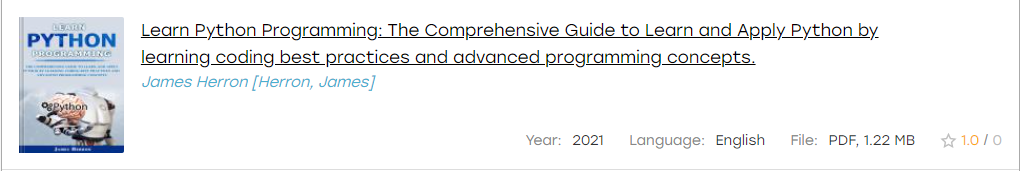

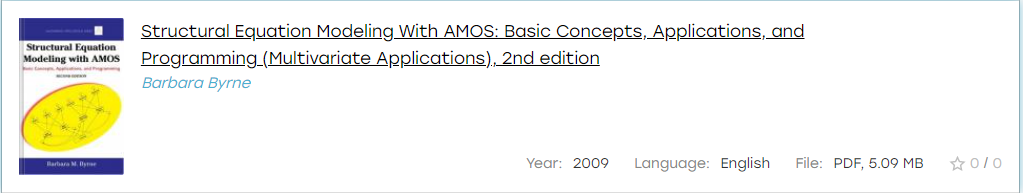

These books are examples for books which didn't have publisher name.

##    

### Let's see our data

In [13]:
data = pd.read_csv('z-library.csv')
data.head()

,title,publisher,author,year
0,Expert Python Programming: Master Python by le...,Packt Publishing,"Michal Jaworski, Tarek Ziadé",2021
1,Rust in Action: Systems programming concepts a...,Manning Publications,Timothy Samuel McNamara,2021
2,"Expert Python Programming, 2nd Edition: Become...",Packt Publishing,"Michal Jaworski, Tarek Ziade",2016
3,Advanced C++ Programming Cookbook: Become an e...,Packt Publishing,Dr. Rian Quinn,2020
4,Learn Python Programming: The Comprehensive Gu...,NaN,"James Herron [Herron, James]",2021


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      50 non-null     object
 1   publisher  46 non-null     object
 2   author     50 non-null     object
 3   year       50 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes
